In [1]:
import h5py
import numpy as  np
from pathlib import Path

from source.preprocessHighFPS import yield_aggregate_bin_files, aggregate_bin_files, \
                                        _to_analytic, _load_file, _chunk_to_fft, _get_radar_filenames,  yield_aggregate_bin_files_new
from source.helper import *


In [2]:
BASE_DIR = Path("E:/radar-project")  # change to your project dir
RADAR_DIR = BASE_DIR / "data/2023_05_08"  # day dir
GROUP_NAME = '2023_05_08' # nazwa grupy (np. dzień pomiaru), de facto to tylko kolejny wymiar
H5_FILENAME = 'complete_dataset'
SEPARATE_FILES = False

In [3]:
files = [
        'background',
        'rafal',
        'bartek',
        'oskar',
        'kuba',
        'oddychacz_3m_o0_s100',
        'oddychacz_3m_o30_s100',
        'oddychacz_3m_o30_s0',
        'oddychacz_2m_o0_s100',
        'oddychacz_2m_o30_s100',
        'oddychacz_2m_o30_s0',
        'oddychacz_4m_o0_s100',
        'oddychacz_4m_o30_s0',
        'oddychacz_4m_o30_s100',
        'wiatrak_4m',
        'wiatrak_3m',
        'wiatrak_2m',
        'wiatrak_foliarz_2m',
        'wiatrak_foliarz_3m',
        'wiatrak_foliarz_4m',
        'randomowe_chodzonko_bartek',
        'randomowe_chodzonko_rafal',
        'randomowe_chodzonko_kuba',
        'randomowe_chodzonko_oskar',
        'samochod',
         ]

In [11]:
if SEPARATE_FILES:
    try:
        h5file = h5py.File('../data/'+ H5_FILENAME + '.h5','r+')
    except:
        print('File not exist, creating file')
        h5file = h5py.File('../data/'+ H5_FILENAME + '.h5','w')

    h5group = h5file.create_group(GROUP_NAME)

    for idx, file in enumerate(files):
        for part_idx, path in enumerate(_get_radar_filenames(GROUP_NAME + '_' + file, RADAR_DIR)):
            new_file_path = GROUP_NAME + '_' + file + '_Raw_' + str(part_idx)
            data = yield_aggregate_bin_files_new(new_file_path, 3, chunk_length=1, radar_dir=RADAR_DIR)

            i = 0
            h5dset =  h5group.create_dataset(name=str(file + '_' + str(part_idx)),
                                         shape=(1, 3, 4, 512),
                                         maxshape=(None,3,4,512),
                                         dtype= np.complex128,
                                         compression='gzip', shuffle=True)

            while True:
                try:
                    chunk = next(data)
                    chunk = _to_analytic(chunk)
                except ValueError:
                    print('File converted')
                    print(f'Chunks number: {i}')
                    break

                if i != 0:
                    h5dset.resize(h5dset.shape[0]+1, axis=0)

                h5dset[i,:,:,:] = chunk[0,:,:,:]
                i+=1

    h5file.close()

else:
    try:
        h5file = h5py.File('../data/'+ H5_FILENAME + '.h5','r+')
    except:
        print('File not exist, creating file')
        h5file = h5py.File('../data/'+ H5_FILENAME + '.h5','w')

    h5group = h5file.create_group(GROUP_NAME)

    for idx, file in enumerate(files):

        i = 0
        h5dset =  h5group.create_dataset(name=file,
                                     shape=(1, 3, 4, 512),
                                     maxshape=(None,3,4,512),
                                     dtype= np.complex128,
                                     compression='gzip', shuffle=True)


        for part_idx, path in enumerate(_get_radar_filenames(GROUP_NAME + '_' + file, RADAR_DIR)):
            new_file_path = GROUP_NAME + '_' + file + '_Raw_' + str(part_idx)
            data = yield_aggregate_bin_files_new(new_file_path, 3, chunk_length=1, radar_dir=RADAR_DIR)

            while True:
                try:
                    chunk = next(data)
                    chunk = _to_analytic(chunk)
                except ValueError:
                    print('File converted')
                    print(f'Chunks number: {i}')
                    break

                if i != 0:
                    h5dset.resize(h5dset.shape[0]+1, axis=0)

                h5dset[i,:,:,:] = chunk[0,:,:,:]
                i+=1

    h5file.close()

ValueError: Unable to create group (name already exists)

In [5]:
loaded_file = h5py.File('../data/'+ H5_FILENAME + '.h5','r')
frames = loaded_file[GROUP_NAME][files[0]]

In [6]:
sample_file = frames[:, 0, 0, :]

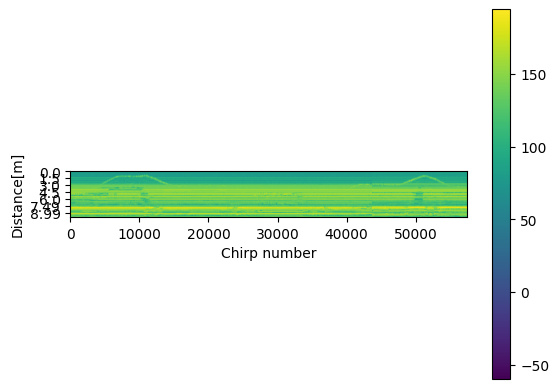

In [7]:
normal_spect, y = gen_spectogram(sample_file)
normal_spect = to_dB(normal_spect)
print_spectogram(normal_spect, y, depth_limit=10)

In [8]:
loaded_file.close()

In [5]:
_get_radar_filenames('2023_05_08_' + files[0], RADAR_DIR)

[WindowsPath('E:/radar-project/data/2023_05_08/2023_05_08_rafal_Raw_0.bin'),
 WindowsPath('E:/radar-project/data/2023_05_08/2023_05_08_rafal_Raw_1.bin'),
 WindowsPath('E:/radar-project/data/2023_05_08/2023_05_08_rafal_Raw_2.bin')]

WindowsPath('E:/radar-project/data/2023_05_08/2023_05_08_rafal_Raw_0.bin')

In [17]:
_get_radar_filenames_new('2023_05_08_' + 'rafal'+ '_Raw_' + '1', RADAR_DIR)

[WindowsPath('E:/radar-project/data/2023_05_08/2023_05_08_rafal_Raw_1.bin')]